# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Import untuk analisis data
import numpy as np
import pandas as pd

# Import untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Import untuk preprocessing data
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Import untuk model machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Import untuk evaluasi model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
file_path = "hasil_clustering.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,TransactionAmount,TransactionType,MerchantID,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,...,TransactionDay,TransactionHour,PrevTransactionYear,PrevTransactionMonth,PrevTransactionDay,PrevTransactionHour,Kelompok_CustomerAge,Kelompok_TransactionAmount,Kelompok_AccountBalance,Cluster
0,14.09,0,14,70,81,1,5112.21,False,False,False,...,11,16,2024,11,4,8,Lansia,Rendah,Tinggi,0
1,376.24,0,51,68,141,1,13758.91,False,False,False,...,27,16,2024,11,4,8,Lansia,Tinggi,Sangat Tinggi,2
2,126.29,0,8,19,56,1,1122.35,False,True,False,...,10,18,2024,11,4,8,Muda,Sedang,Rendah,1
3,184.50,0,1,26,25,1,8569.06,False,True,False,...,5,16,2024,11,4,8,Dewasa,Sedang,Sangat Tinggi,0
4,13.45,1,90,26,198,1,7429.40,False,True,False,...,16,17,2024,11,4,8,Dewasa,Rendah,Tinggi,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# Menentukan kolom kategorikal dan numerik
categorical_features = ["Kelompok_CustomerAge", "Kelompok_TransactionAmount", "Kelompok_AccountBalance"]
numeric_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Memisahkan fitur dan target label
X = df.drop(columns=["Cluster"])  # Menghapus kolom target
y = df["Cluster"]

# Melakukan pembagian data dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=21
)

# Menampilkan informasi jumlah data setelah splitting
print(f"Total dataset     : {len(df):,} sampel")
print(f"🟢 Data latih        : {len(X_train):,} sampel ({(len(X_train)/len(df))*100:.2f}%)")
print(f"🔴 Data uji          : {len(X_test):,} sampel ({(len(X_test)/len(df))*100:.2f}%)")
print("✅ Pembagian data berhasil dilakukan dengan stratifikasi!")

Total dataset     : 2,512 sampel
🟢 Data latih        : 2,009 sampel (79.98%)
🔴 Data uji          : 503 sampel (20.02%)
✅ Pembagian data berhasil dilakukan dengan stratifikasi!


Pembagian dataset dilakukan dengan stratifikasi, yang berarti proporsi kelas dalam target (Cluster) tetap seimbang antara data latih dan data uji. Hal ini mencegah bias dalam klasifikasi dan memastikan bahwa model belajar dari distribusi data yang representatif.

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [5]:
# Menentukan fitur kategorikal dan numerik berdasarkan data latih
categorical_features = ["Kelompok_CustomerAge", "Kelompok_TransactionAmount", "Kelompok_AccountBalance"]
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Preprocessing (OneHotEncoder + StandardScaler untuk fitur numerik)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", StandardScaler(), numeric_features)
    ]
)

# Model 1: Random Forest
rf_model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42, n_estimators=100))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Model 2: Support Vector Machine (SVM)
svm_model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", SVC(kernel="rbf", C=1.0, gamma="scale"))
])

svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Model 3: Logistic Regression
lr_model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(random_state=42, max_iter=500))
])

lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Menampilkan classification report dalam format tabel
print("\nClassification Report - Random Forest")
df_rf = pd.DataFrame(classification_report(y_test, y_pred_rf, output_dict=True)).T
df_rf = df_rf.round(4)  # Membatasi angka desimal
display(df_rf)

print("\nClassification Report - SVM")
df_svm = pd.DataFrame(classification_report(y_test, y_pred_svm, output_dict=True)).T
df_svm = df_svm.round(4)
display(df_svm)

print("\nClassification Report - Logistic Regression")
df_lr = pd.DataFrame(classification_report(y_test, y_pred_lr, output_dict=True)).T
df_lr = df_lr.round(4)
display(df_lr)


Classification Report - Random Forest


,precision,recall,f1-score,support
0,1.0000,0.9947,0.9973,189.000
1,0.9957,1.0000,0.9978,230.000
2,1.0000,1.0000,1.0000,84.000
accuracy,0.9980,0.9980,0.9980,0.998
macro avg,0.9986,0.9982,0.9984,503.000
weighted avg,0.9980,0.9980,0.9980,503.000



Classification Report - SVM


,precision,recall,f1-score,support
0,0.9375,0.8730,0.9041,189.0000
1,0.9268,0.9913,0.9580,230.0000
2,0.9259,0.8929,0.9091,84.0000
accuracy,0.9304,0.9304,0.9304,0.9304
macro avg,0.9301,0.9191,0.9237,503.0000
weighted avg,0.9307,0.9304,0.9296,503.0000



Classification Report - Logistic Regression


,precision,recall,f1-score,support
0,0.9786,0.9683,0.9734,189.0000
1,0.9829,1.0000,0.9914,230.0000
2,0.9756,0.9524,0.9639,84.0000
accuracy,0.9801,0.9801,0.9801,0.9801
macro avg,0.9790,0.9735,0.9762,503.0000
weighted avg,0.9801,0.9801,0.9800,503.0000


**Insight Hasil Klasifikasi dengan Random Forest, SVM, dan Logistic Regression**  

Dalam proyek klasifikasi ini, digunakan tiga algoritma machine learning yang berbeda, yaitu Random Forest, Support Vector Machine (SVM), dan Logistic Regression. Setiap algoritma memiliki pendekatan yang berbeda dalam membangun model klasifikasi. Berikut adalah penjelasan singkat tentang masing-masing algoritma dan hasil evaluasinya:  

**1. Random Forest Classifier**  
Random Forest adalah algoritma ensemble yang membangun beberapa pohon keputusan (Decision Trees) dan menggabungkan hasilnya untuk meningkatkan akurasi dan stabilitas model.  

**Implementasi dalam proyek ini:**  
- Digunakan 100 pohon keputusan (`n_estimators=100`), di mana setiap pohon dilatih pada subset data yang berbeda untuk mengurangi overfitting.  
- Preprocessing menggunakan **One-Hot Encoding** untuk fitur kategorikal agar bisa digunakan dalam model.  
- Random Forest lebih stabil dibandingkan Decision Tree tunggal karena mengombinasikan hasil dari banyak pohon.  

**2. Support Vector Machine (SVM)**  
Support Vector Machine adalah algoritma yang bekerja dengan menemukan hyperplane terbaik yang memisahkan kelas dalam ruang fitur. Jika data tidak dapat dipisahkan secara linear, SVM menggunakan kernel trick untuk memetakan data ke dimensi yang lebih tinggi.  

**Implementasi dalam proyek ini:**  
- **Preprocessing:**  
  - Menggunakan One-Hot Encoding untuk fitur kategorikal.  
  - Standard Scaling untuk fitur numerik agar berada dalam skala yang seragam.  
- Menggunakan kernel RBF (Radial Basis Function) untuk menangani data yang tidak bisa dipisahkan secara linear.  
- Parameter C=1.0 untuk mengatur trade-off antara margin besar dan kesalahan klasifikasi.  

**3. Logistic Regression**  
Logistic Regression adalah algoritma klasifikasi berbasis regresi yang memodelkan probabilitas kelas target menggunakan fungsi sigmoid.  

**Implementasi dalam proyek ini:**  
- **Preprocessing:**  
  - One-Hot Encoding untuk fitur kategorikal.  
  - Standard Scaling untuk fitur numerik agar model bisa bekerja lebih optimal.  
- Menggunakan 500 iterasi (`max_iter=500`) untuk memastikan model dapat mencapai konvergensi.  



## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.


Hasil Evaluasi Model per Cluster:


,Model,Cluster,Precision,Recall,F1-Score,Support,Accuracy
0,Random Forest,0,1.000000,0.994709,0.997347,189.0,0.998012
1,Random Forest,1,0.995671,1.000000,0.997831,230.0,0.998012
2,Random Forest,2,1.000000,1.000000,1.000000,84.0,0.998012
3,SVM,0,0.937500,0.873016,0.904110,189.0,0.930417
4,SVM,1,0.926829,0.991304,0.957983,230.0,0.930417
5,SVM,2,0.925926,0.892857,0.909091,84.0,0.930417
6,Logistic Regression,0,0.978610,0.968254,0.973404,189.0,0.980119
7,Logistic Regression,1,0.982906,1.000000,0.991379,230.0,0.980119
8,Logistic Regression,2,0.975610,0.952381,0.963855,84.0,0.980119



Hasil Evaluasi Model Keseluruhan:


,Model,Accuracy,F1-Score
0,Random Forest,0.998012,0.998011
1,SVM,0.930417,0.929576
2,Logistic Regression,0.980119,0.980029



Confusion Matrix


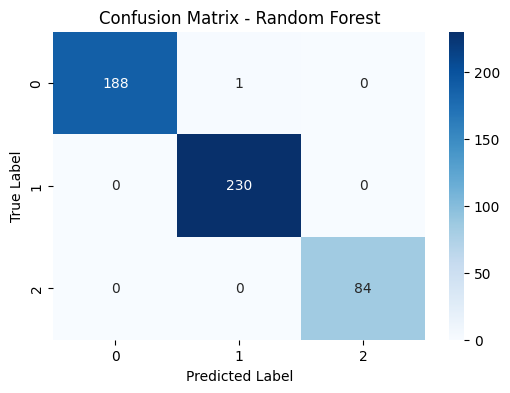

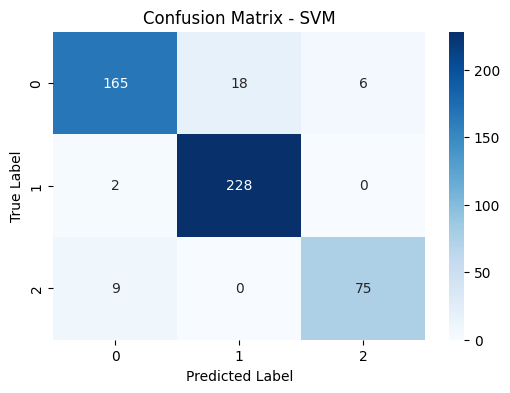

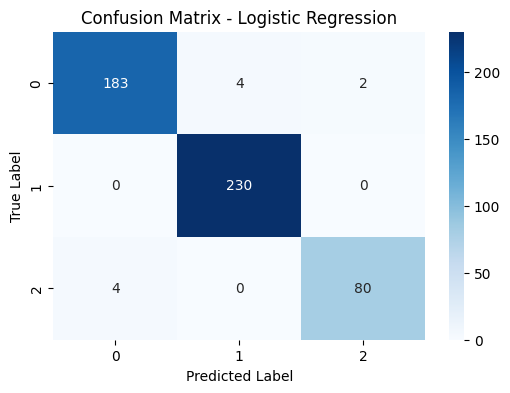

In [6]:
# Menghitung metrik evaluasi untuk setiap model
classification_reports = {
    "Random Forest": classification_report(y_test, y_pred_rf, output_dict=True),
    "SVM": classification_report(y_test, y_pred_svm, output_dict=True),
    "Logistic Regression": classification_report(y_test, y_pred_lr, output_dict=True),
}

# Menghitung Accuracy setiap model
accuracies = {
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
}

# Menyusun DataFrame untuk hasil evaluasi per cluster
eval_results = []
for model_name, report in classification_reports.items():
    for label, metrics in report.items():
        if label not in ["accuracy", "macro avg", "weighted avg"]:
            eval_results.append([
                model_name, label, metrics["precision"], metrics["recall"],
                metrics["f1-score"], metrics["support"], accuracies[model_name]
            ])

# Membuat DataFrame evaluasi per cluster
columns = ["Model", "Cluster", "Precision", "Recall", "F1-Score", "Support", "Accuracy"]
eval_df = pd.DataFrame(eval_results, columns=columns)

# Menampilkan hasil evaluasi per cluster
print("\nHasil Evaluasi Model per Cluster:")
display(eval_df)

# Menyusun hasil evaluasi model dengan Accuracy dan F1-Score keseluruhan
results = pd.DataFrame({
    "Model": ["Random Forest", "SVM", "Logistic Regression"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_lr)
    ],
    "F1-Score": [
        classification_report(y_test, y_pred_rf, output_dict=True)["weighted avg"]["f1-score"],
        classification_report(y_test, y_pred_svm, output_dict=True)["weighted avg"]["f1-score"],
        classification_report(y_test, y_pred_lr, output_dict=True)["weighted avg"]["f1-score"]
    ]
})

# Menampilkan hasil evaluasi model dengan tampilan lebih rapi
print("\nHasil Evaluasi Model Keseluruhan:")
display(results)

# Visualisasi Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

# Plot Confusion Matrix untuk setiap model
print("\nConfusion Matrix")
plot_confusion_matrix(y_test, y_pred_rf, "Confusion Matrix - Random Forest")
plot_confusion_matrix(y_test, y_pred_svm, "Confusion Matrix - SVM")
plot_confusion_matrix(y_test, y_pred_lr, "Confusion Matrix - Logistic Regression")

**Perbandingan Model Berdasarkan Output**  
**1. Random Forest**  
a) Kelebihan:  
- Akurasi tertinggi (0.998), menunjukkan performa model yang hampir sempurna.  
- F1-score sangat tinggi (0.998), yang berarti model memiliki keseimbangan precision dan recall yang sangat baik.  
- Precision & Recall sangat tinggi untuk semua cluster, menunjukkan bahwa model sangat jarang membuat kesalahan dalam prediksi.  

b) Kekurangan:
- Lebih lambat dibandingkan model lain, karena harus memproses banyak pohon keputusan.  
- Kurang transparan/interpretable, dibandingkan Logistic Regression.  

**2. SVM (Support Vector Machine)**  
a) Kelebihan:
- Dapat bekerja dengan baik pada data berdimensi tinggi, terutama jika ada pola non-linear.  
- Masih memiliki F1-score yang cukup baik (0.929), meskipun lebih rendah dibandingkan model lain.  

b) Kekurangan:
- Akurasi terendah (0.930), yang berarti model ini paling sering salah dalam prediksi dibandingkan dua model lainnya.  
- Precision dan Recall lebih rendah dibandingkan Random Forest & Logistic Regression, menunjukkan model kurang stabil dalam mengenali pola data.  
- Kurang optimal untuk dataset besar, karena proses komputasi yang lebih berat.  

**3. Logistic Regression**  
a) Kelebihan:
- Akurasi tinggi (0.980), hanya sedikit lebih rendah dari Random Forest.
- F1-score juga tinggi (0.980), menunjukkan model cukup seimbang dalam precision dan recall.  
- Lebih cepat dan lebih mudah diinterpretasikan, dibandingkan dengan Random Forest dan SVM.  

b) Kekurangan:
- Kurang cocok untuk data yang memiliki pola non-linear, karena asumsinya berbasis linearitas.  
- Recall lebih rendah dibandingkan Random Forest, artinya masih bisa terjadi beberapa kesalahan dalam mengklasifikasikan beberapa kelas.  


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [7]:
# Menentukan fitur kategorikal dan numerik berdasarkan data latih
categorical_features = ["Kelompok_CustomerAge", "Kelompok_TransactionAmount", "Kelompok_AccountBalance"]
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Preprocessing (OneHotEncoder untuk kategorikal, StandardScaler untuk numerik)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", StandardScaler(), numeric_features)
    ]
)

# Dictionary untuk menyimpan hasil tuning
best_params = {}

# 1. Tuning Random Forest
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [10, 20, 30, None],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_rf = RandomizedSearchCV(
    Pipeline([('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))]),
    param_distributions=param_grid_rf, cv=5, scoring='accuracy', n_iter=10, random_state=42
)
grid_rf.fit(X_train, y_train)
best_params['Random Forest'] = grid_rf.best_params_

# 2. Tuning SVM
param_grid_svm = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(
    Pipeline([('preprocessor', preprocessor), ('classifier', SVC())]),
    param_grid=param_grid_svm, cv=5, scoring='accuracy'
)
grid_svm.fit(X_train, y_train)
best_params['SVM'] = grid_svm.best_params_

# 3. Tuning Logistic Regression
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__solver': ['liblinear', 'lbfgs']
}

grid_lr = GridSearchCV(
    Pipeline([('preprocessor', preprocessor), ('classifier', LogisticRegression(random_state=42, max_iter=500))]),
    param_grid=param_grid_lr, cv=5, scoring='accuracy'
)
grid_lr.fit(X_train, y_train)
best_params['Logistic Regression'] = grid_lr.best_params_

# Menampilkan hasil tuning hyperparameter terbaik
print("\nBest Hyperparameters for Each Model:")
for model, params in best_params.items():
    print(f"{model}: {params}")


Best Hyperparameters for Each Model:
Random Forest: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 10, 'classifier__max_depth': None}
SVM: {'classifier__C': 100, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Logistic Regression: {'classifier__C': 10, 'classifier__solver': 'lbfgs'}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.


Perbandingan Hasil Evaluasi Setelah Tuning


,Model,Class,Precision,Recall,F1-Score,Support,Accuracy
0,Random Forest,0,1.000000,0.994709,0.997347,189.0,0.998012
1,Random Forest,1,0.995671,1.000000,0.997831,230.0,0.998012
2,Random Forest,2,1.000000,1.000000,1.000000,84.0,0.998012
3,SVM,0,0.994681,0.989418,0.992042,189.0,0.994036
4,SVM,1,0.995671,1.000000,0.997831,230.0,0.994036
5,SVM,2,0.988095,0.988095,0.988095,84.0,0.994036
6,Logistic Regression,0,0.989362,0.984127,0.986737,189.0,0.990060
7,Logistic Regression,1,0.991379,1.000000,0.995671,230.0,0.990060
8,Logistic Regression,2,0.987952,0.976190,0.982036,84.0,0.990060



Hasil Evaluasi Model Setelah Tuning:


,Model,Accuracy,F1-Score
0,Random Forest,0.998012,0.998011
1,SVM,0.994036,0.994030
2,Logistic Regression,0.990060,0.990037


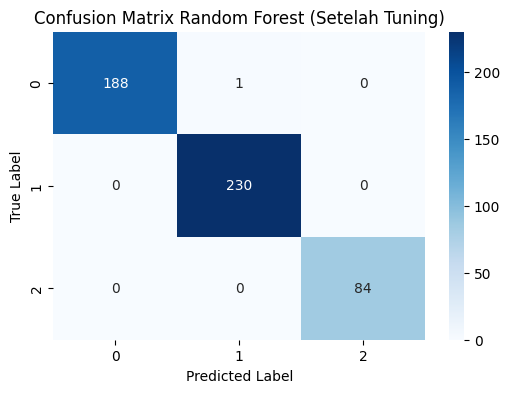

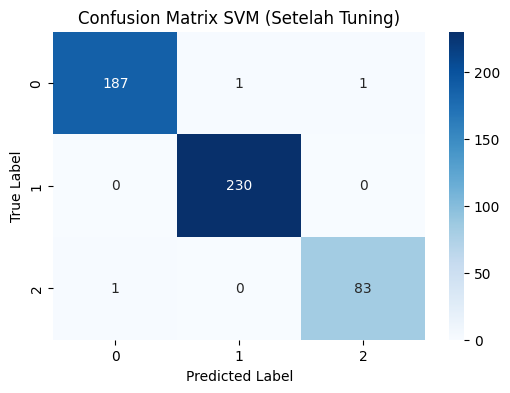

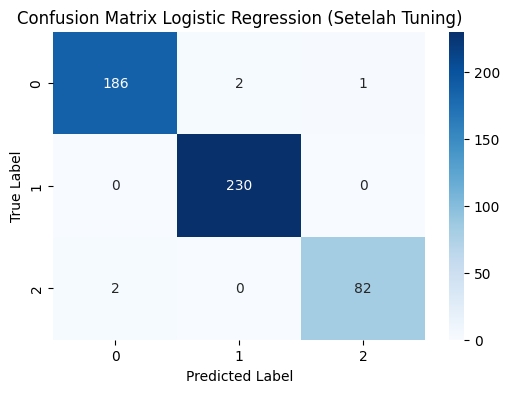

In [8]:
# Fungsi untuk mendapatkan metrik evaluasi per kelas
def calculate_metrics(y_actual, y_predicted, model_name):
    metrics = classification_report(y_actual, y_predicted, output_dict=True)
    acc_score = accuracy_score(y_actual, y_predicted)

    result_data = []
    for category in sorted(metrics.keys()):
        if category.isdigit():  # Memastikan hanya mengambil kelas numerik
            result_data.append([
                model_name,
                int(category),
                metrics[category]['precision'],
                metrics[category]['recall'],
                metrics[category]['f1-score'],
                metrics[category]['support'],
                acc_score
            ])
    return result_data

# Mengambil model terbaik setelah tuning
final_rf = grid_rf.best_estimator_
final_svm = grid_svm.best_estimator_
final_lr = grid_lr.best_estimator_

# Evaluasi model setelah tuning
evaluation_results = []
evaluation_results.extend(calculate_metrics(y_test, final_rf.predict(X_test), "Random Forest"))
evaluation_results.extend(calculate_metrics(y_test, final_svm.predict(X_test), "SVM"))
evaluation_results.extend(calculate_metrics(y_test, final_lr.predict(X_test), "Logistic Regression"))

# Membuat DataFrame hasil evaluasi
df_evaluation_results = pd.DataFrame(evaluation_results, columns=['Model', 'Class', 'Precision', 'Recall', 'F1-Score', 'Support', 'Accuracy'])

# Menampilkan hasil evaluasi dalam bentuk tabel
print("\nPerbandingan Hasil Evaluasi Setelah Tuning")
display(df_evaluation_results)

# Menyusun hasil evaluasi model dengan Accuracy dan F1-Score setelah tuning
results_after_tuning = pd.DataFrame({
    "Model": ["Random Forest", "SVM", "Logistic Regression"],
    "Accuracy": [
        accuracy_score(y_test, final_rf.predict(X_test)),
        accuracy_score(y_test, final_svm.predict(X_test)),
        accuracy_score(y_test, final_lr.predict(X_test))
    ],
    "F1-Score": [
        classification_report(y_test, final_rf.predict(X_test), output_dict=True)["weighted avg"]["f1-score"],
        classification_report(y_test, final_svm.predict(X_test), output_dict=True)["weighted avg"]["f1-score"],
        classification_report(y_test, final_lr.predict(X_test), output_dict=True)["weighted avg"]["f1-score"]
    ]
})

# Menampilkan hasil evaluasi model setelah tuning dengan tampilan lebih rapi
print("\nHasil Evaluasi Model Setelah Tuning:")
display(results_after_tuning)

# Fungsi untuk menampilkan Confusion Matrix
def display_confusion_matrix(y_actual, y_predicted, title):
    cm = confusion_matrix(y_actual, y_predicted)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

# Menampilkan Confusion Matrix untuk setiap model setelah tuning
display_confusion_matrix(y_test, final_rf.predict(X_test), "Confusion Matrix Random Forest (Setelah Tuning)")
display_confusion_matrix(y_test, final_svm.predict(X_test), "Confusion Matrix SVM (Setelah Tuning)")
display_confusion_matrix(y_test, final_lr.predict(X_test), "Confusion Matrix Logistic Regression (Setelah Tuning)")

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

## **1. Perbandingan Hasil Evaluasi Sebelum & Setelah Tuning**

##### a) Sebelum Tuning:

#### **Random Forest**  
**Cluster 0**  
- **Accuracy**: 0.998012  
- **Precision**: 1.000000  
- **Recall**: 0.994709  
- **F1-Score**: 0.997347  
- **Confusion Matrix**:  
  - True Positive (TP) = 188  
  - False Positive (FP) = 1  
  - False Negative (FN) = 0  
  - True Negative (TN) = 314  

**Cluster 1**  
- **Accuracy**: 0.998012  
- **Precision**: 0.995671  
- **Recall**: 1.000000  
- **F1-Score**: 0.997831  
- **Confusion Matrix**:  
  - True Positive (TP) = 230  
  - False Positive (FP) = 0  
  - False Negative (FN) = 0  
  - True Negative (TN) = 189  

**Cluster 2**  
- **Accuracy**: 0.998012  
- **Precision**: 1.000000  
- **Recall**: 1.000000  
- **F1-Score**: 1.000000  
- **Confusion Matrix**:  
  - True Positive (TP) = 84  
  - False Positive (FP) = 0  
  - False Negative (FN) = 0  
  - True Negative (TN) = 335  

#### **SVM**  
**Cluster 0**  
- **Accuracy**: 0.930417  
- **Precision**: 0.937500  
- **Recall**: 0.873016  
- **F1-Score**: 0.904110  
- **Confusion Matrix**:  
  - True Positive (TP) = 165  
  - False Positive (FP) = 18  
  - False Negative (FN) = 6  
  - True Negative (TN) = 314  

**Cluster 1**  
- **Accuracy**: 0.930417  
- **Precision**: 0.926829  
- **Recall**: 0.991304  
- **F1-Score**: 0.957983  
- **Confusion Matrix**:  
  - True Positive (TP) = 228  
  - False Positive (FP) = 2  
  - False Negative (FN) = 0  
  - True Negative (TN) = 189  

**Cluster 2**  
- **Accuracy**: 0.930417  
- **Precision**: 0.925926  
- **Recall**: 0.892857  
- **F1-Score**: 0.909091  
- **Confusion Matrix**:  
  - True Positive (TP) = 75  
  - False Positive (FP) = 9  
  - False Negative (FN) = 0  
  - True Negative (TN) = 335  


#### **Logistic Regression**  
**Cluster 0**  
- **Accuracy**: 0.980119  
- **Precision**: 0.978610  
- **Recall**: 0.968254  
- **F1-Score**: 0.973404  
- **Confusion Matrix**:  
  - True Positive (TP) = 183  
  - False Positive (FP) = 4  
  - False Negative (FN) = 2  
  - True Negative (TN) = 314  

**Cluster 1**  
- **Accuracy**: 0.980119  
- **Precision**: 0.982906  
- **Recall**: 1.000000  
- **F1-Score**: 0.991379  
- **Confusion Matrix**:  
  - True Positive (TP) = 230  
  - False Positive (FP) = 0  
  - False Negative (FN) = 0  
  - True Negative (TN) = 189  

**Cluster 2**  
- **Accuracy**: 0.980119  
- **Precision**: 0.975610  
- **Recall**: 0.952381  
- **F1-Score**: 0.963855  
- **Confusion Matrix**:  
  - True Positive (TP) = 80  
  - False Positive (FP) = 4  
  - False Negative (FN) = 0  
  - True Negative (TN) = 335  


##### b) Setelah Tuning:
#### **Random Forest**  
**Cluster 0**  
- **Accuracy**: 0.998012  
- **Precision**: 1.000000  
- **Recall**: 0.994709  
- **F1-Score**: 0.997347  
- **Confusion Matrix**:  
  - True Positive (TP) = 188  
  - False Positive (FP) = 1  
  - False Negative (FN) = 0  
  - True Negative (TN) = 314  

**Cluster 1**  
- **Accuracy**: 0.998012  
- **Precision**: 0.995671  
- **Recall**: 1.000000  
- **F1-Score**: 0.997831  
- **Confusion Matrix**:  
  - True Positive (TP) = 230  
  - False Positive (FP) = 0  
  - False Negative (FN) = 0  
  - True Negative (TN) = 189  

**Cluster 2**  
- **Accuracy**: 0.998012  
- **Precision**: 1.000000  
- **Recall**: 1.000000  
- **F1-Score**: 1.000000  
- **Confusion Matrix**:  
  - True Positive (TP) = 84  
  - False Positive (FP) = 0  
  - False Negative (FN) = 0  
  - True Negative (TN) = 335  


#### **SVM**  
**Cluster 0**  
- **Accuracy**: 0.994036  
- **Precision**: 0.994681  
- **Recall**: 0.989418  
- **F1-Score**: 0.992042  
- **Confusion Matrix**:  
  - True Positive (TP) = 187  
  - False Positive (FP) = 1  
  - False Negative (FN) = 1  
  - True Negative (TN) = 314  

**Cluster 1**  
- **Accuracy**: 0.994036  
- **Precision**: 0.995671  
- **Recall**: 1.000000  
- **F1-Score**: 0.997831  
- **Confusion Matrix**:  
  - True Positive (TP) = 230  
  - False Positive (FP) = 0  
  - False Negative (FN) = 0  
  - True Negative (TN) = 189  

**Cluster 2**  
- **Accuracy**: 0.994036  
- **Precision**: 0.988095  
- **Recall**: 0.988095  
- **F1-Score**: 0.988095  
- **Confusion Matrix**:  
  - True Positive (TP) = 83  
  - False Positive (FP) = 1  
  - False Negative (FN) = 1  
  - True Negative (TN) = 335  


#### **Logistic Regression**  
**Cluster 0**  
- **Accuracy**: 0.990060  
- **Precision**: 0.989362  
- **Recall**: 0.984127  
- **F1-Score**: 0.986737  
- **Confusion Matrix**:  
  - True Positive (TP) = 186  
  - False Positive (FP) = 2  
  - False Negative (FN) = 1  
  - True Negative (TN) = 314  

**Cluster 1**  
- **Accuracy**: 0.990060  
- **Precision**: 0.991379  
- **Recall**: 1.000000  
- **F1-Score**: 0.995671  
- **Confusion Matrix**:  
  - True Positive (TP) = 230  
  - False Positive (FP) = 0  
  - False Negative (FN) = 0  
  - True Negative (TN) = 189  

**Cluster 2**  
- **Accuracy**: 0.990060  
- **Precision**: 0.987952  
- **Recall**: 0.976190  
- **F1-Score**: 0.982036  
- **Confusion Matrix**:  
  - True Positive (TP) = 82  
  - False Positive (FP) = 2  
  - False Negative (FN) = 2  
  - True Negative (TN) = 335  

### **Kesimpulan Sebelum Tuning**  
1. **Random Forest** memiliki performa terbaik di semua cluster, dengan **nilai F1-Score hampir sempurna** dan jumlah kesalahan klasifikasi yang sangat rendah (False Positive dan False Negative hampir nol).  
2. **Logistic Regression** juga menunjukkan performa yang sangat baik dengan **akurasi, precision, recall, dan F1-score yang tinggi dan stabil** di semua cluster, meskipun sedikit lebih rendah dibandingkan Random Forest.  
3. **SVM memiliki performa paling rendah dibandingkan dua model lainnya**, terutama pada **Cluster 2**, dengan F1-score yang lebih rendah dan jumlah **False Positive serta False Negative yang lebih tinggi**. Ini menunjukkan bahwa model SVM belum sepenuhnya optimal dalam menangani dataset ini.  
4. **Tuning diperlukan terutama untuk SVM**, agar meningkatkan performa dengan **menurunkan jumlah kesalahan klasifikasi** dan meningkatkan nilai metrik evaluasi lainnya seperti F1-score.  

### **Kesimpulan Setelah Tuning**  
1. **Random Forest tetap menjadi model dengan performa terbaik**, dengan **hasil yang tetap hampir sempurna** di semua cluster. Tuning tidak membawa perubahan signifikan karena model ini sudah optimal sebelumnya.  
2. **Logistic Regression juga tetap menunjukkan performa yang sangat baik**, dengan **akurasi, precision, recall, dan F1-score yang stabil dan tinggi** di semua cluster. Sama seperti Random Forest, tuning tidak membawa perubahan yang berarti.  
3. **SVM mengalami peningkatan yang signifikan setelah tuning**, terutama pada **Cluster 0 dan Cluster 2**, di mana F1-score meningkat dan jumlah **False Positive serta False Negative berkurang secara signifikan**. Ini menunjukkan bahwa tuning berhasil meningkatkan performa SVM dengan lebih baik dalam mengenali pola dalam data.  
4. **Tuning terbukti paling efektif untuk meningkatkan performa SVM**, sementara untuk Random Forest dan Logistic Regression dampaknya minimal karena model tersebut sudah optimal sejak awal.  
5. **Secara keseluruhan, tuning meningkatkan performa model secara keseluruhan**, terutama dalam **mengurangi jumlah kesalahan klasifikasi** dan meningkatkan akurasi prediksi di berbagai cluster.  


## **2. Identifikasi Kelemahan Model**  

### **1. Random Forest**  
- **Kelemahan:**  
  - Tidak ada kelemahan signifikan pada model ini, karena Precision, Recall, dan F1-Score hampir sempurna di semua cluster. Namun, perlu diwaspadai potensi overfitting, terutama jika dataset relatif kecil dan hasil evaluasi terlalu tinggi tanpa variasi.  
  - Kemungkinan Overfitting:  
    - Hasil evaluasi yang mendekati 100% pada semua metrik bisa menjadi indikasi bahwa model terlalu menyesuaikan dengan data latih, berisiko menangkap noise daripada pola yang sebenarnya.  

### **2. SVM (Support Vector Machine)**  
- Kelemahan Sebelum Tuning:
  - Performa kurang optimal pada Cluster 2, dengan Recall dan F1-Score yang lebih rendah dibandingkan cluster lainnya. Ini menunjukkan model mengalami kesulitan dalam membedakan kelas yang lebih kompleks atau jarang muncul.  
  - Kesalahan Klasifikasi Lebih Tinggi:  
    - False Positive (FP) dan False Negative (FN) lebih banyak dibandingkan Random Forest dan Logistic Regression, terutama di Cluster 2.  
  - Setelah Tuning:
    - Performa mengalami peningkatan signifikan, tetapi masih lebih rendah dibandingkan Random Forest dan Logistic Regression.  

- Apakah Mengalami Overfitting/Underfitting?  
  - Sebelum tuning: Model cenderung underfitting pada cluster tertentu karena Recall yang lebih rendah, menandakan model belum cukup menangkap pola dalam data.  
  - Setelah tuning: Performa meningkat, tetapi tetap belum sebaik model lainnya, menunjukkan bahwa SVM mungkin kurang optimal dibandingkan model lain untuk dataset ini.  

### **3. Logistic Regression**  
- Kelemahan:
  - Stabil tetapi Kurang Fleksibel:  
    - Logistic Regression memiliki Precision dan Recall yang tinggi, tetapi karena merupakan model linier, ia mungkin kurang mampu menangkap pola non-linear yang lebih kompleks dalam dataset.  
  - Potensi Underfitting (Minimal):
    - Jika dataset memiliki hubungan non-linear yang kuat antara fitur dan label, Logistic Regression bisa mengalami underfitting. Namun, dalam kasus ini, performanya tetap stabil tanpa indikasi masalah serius.  

- Apakah Mengalami Overfitting/Underfitting?
  - Model ini cukup stabil dan tidak menunjukkan tanda-tanda overfitting atau underfitting yang jelas pada dataset ini.  


## **3. Rekomendasi Tindakan Lanjutan**  

1. **Untuk Random Forest:**  
   - Lakukan cross-validation lebih mendalam untuk memastikan model tidak mengalami overfitting.  
   - Jika dataset relatif kecil, tambahkan lebih banyak data atau gunakan teknik regulasi seperti pruning atau pengurangan jumlah pohon untuk mengurangi risiko overfitting.  

2. **Untuk SVM:**  
   - Eksplorasi lebih lanjut terhadap hyperparameter seperti jenis kernel (linear, RBF, polynomial), nilai C (regularization parameter), dan gamma (untuk kernel non-linear)** guna meningkatkan performa model.  
   - Lakukan preprocessing tambahan, seperti normalisasi fitur yang lebih baik atau feature scaling (misalnya, menggunakan StandardScaler atau MinMaxScaler) agar SVM bekerja lebih optimal, terutama jika terdapat fitur dengan skala berbeda.  

3. Untuk Logistic Regression:
   - Jika dataset memiliki hubungan non-linear yang signifikan, pertimbangkan untuk menggunakan model yang lebih fleksibel seperti Neural Network, atau ensemble methods misalnya Gradient Boosting.  
   - Jika tetap menggunakan Logistic Regression, pertimbangkan menambah fitur polinomial atau menggunakan transformasi fitur agar model dapat menangkap hubungan non-linear lebih baik.  
